In [1]:
%matplotlib inline
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import ps2

caller_list = list() # holds names of all callers
twodig_list = list() # holds 2dig accuracies of all callers
fourdig_list = list() # holds 4dig accuracies of all callers

# compute 2dig and 4dig accuracy

In [ ]:
def d2_class1_accuracy(caller_name):
  # Run for D2 accuracy 4 dig res
  root1 = '../datasets/'
  root2 = '../results/standard/{}'.format(caller_name)
  fourdig = 0
  twodig = 0
  numsamples = 0
  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass
  #index list holds the order the prediction samples are in, relative to GS
  #print(len(index_list))

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:7])

    for k in range(0,6):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])

  numsamples += len(gold_set)
  # 4 digit resolution
  hit4 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(gold_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:7] for elem in allele_list_next)

        #print(allele_list_curr)

        if pred_set[i] in allele_list_curr:
          hit4 +=1 
        elif pred_set[i] in allele_list_prev:
          hit4 += 1
        elif pred_set[i] in allele_list_next:
          hit4 += 1
      else:
        if gold_set[i][0:7] == pred_set[i]:
          hit4 +=1 
        elif pred_set[i] == gold_set[i-1][0:7]:
          hit4 += 1
        elif pred_set[i] == gold_set[i+1][0:7]:
          hit4 += 1
    except:
      pass

  #print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
  #print(hit4,len(pred_set))
  four_dig=hit4*100/len(gold_set)
  fourdig = fourdig + hit4

    # Run for D2 accuracy 2 dig res


  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass
  #index list holds the order the prediction samples are in, relative to GS
  #print(len(index_list))

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:4])

    for k in range(0,6):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])

  #numsamples += len(gold_set)
  # 2 digit resolution
  hit2 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(pred_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:4] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:4] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:4] for elem in allele_list_next)

        if pred_set[i][0:4] in allele_list_curr:
          hit2 +=1 
        elif pred_set[i][0:4] in allele_list_prev:
          hit2 += 1
        elif pred_set[i][0:4] in allele_list_next:
          hit2 += 1
      else:
        if gold_set[i][0:4] == pred_set[i][0:4]:
          hit2 +=1 
        elif pred_set[i][0:4] == gold_set[i-1][0:4]:
          hit2 += 1
        elif pred_set[i][0:4] == gold_set[i+1][0:4]:
          hit2 += 1
    except:
      pass

  #print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
  #print(hit2,len(gold_set))
  twodig = twodig + hit2
  two_dig=hit2*100/len(gold_set)
  return caller_name,four_dig,two_dig,numsamples,twodig,fourdig




In [ ]:
def accuracy_class1(caller_name, rl):
  dir_1 = '../datasets/readlength_gs_d2.csv'
  dir_2 = '../results/read_length/standard/{}'.format(caller_name+"_"+str(rl)+".csv")
  fourdig = 0
  twodig = 0
  numsamples = 0

  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)
  pre=pre.set_index(pre.columns[0])
  mask = pre.apply(lambda col: col.astype(str).str.contains('A|B|C').any(),axis=0)
  pre=pre.loc[: , mask]
  pre=pre.reset_index()
  pre=pre.fillna('DRB1*00:00')
  # twodig_hit = 0
  # fourdig_hit = 0
  #print(pre)

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
      try: index_list.append( pre_accessions.index(i) )
      except: pass

  #constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
      try:
        g = goldstandard[i][1:7]
        p_raw = prediction[index_list[i]][1:7]
        p = list()
      except: 
        pass
    
      for i in p_raw:
        p.append(i[0:10])

      for k in range(0,len(g)):
        gold_set.append(g[k]) # all alleles for the accession number
        pred_set.append(p[k])


  numsamples += len(gold_set)
  #print(gold_set)
  #print(pred_set)

  # 4 digit resolution
  hit = 0
  #fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
  for i in range(0,len(gold_set)):
    try:
      if gold_set[i][5:10] == pred_set[i][5:10]:
        hit +=1 
      elif pred_set[i][5:10] == gold_set[i-1][5:10]:
        hit += 1
      elif pred_set[i][5:10] == gold_set[i+1][5:10]:
        hit += 1
    except:
      pass

  #print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
  #print(hit,len(gold_set))
  fourdig = fourdig + hit
  four_dig=hit*100/len(gold_set)

  # 2 digit resolution
  hit = 0
  for i in range(0,len(gold_set)):
    try:
      if gold_set[i][5:7] == pred_set[i][5:7]:
        hit +=1 
      elif pred_set[i][5:7] == gold_set[i-1][5:7]:
        hit += 1
      elif pred_set[i][5:7] == gold_set[i+1][5:7]:
        hit += 1
    except:
      pass
    
  #print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
  #print(hit,len(gold_set))
  two_dig = hit*100/len(gold_set)
  twodig = twodig + hit
  return four_dig,two_dig

In [61]:
def accuracy_class2(caller_name, rl):
    dir_1 = '../datasets/readlength_gs.csv'
    dir_2 = '../results/read_length/standard/{}'.format(caller_name+"_"+str(rl)+".csv")
    fourdig = 0
    twodig = 0
    numsamples = 0

    gs = pd.read_csv(dir_1)
    pre = pd.read_csv(dir_2)
    pre=pre.set_index(pre.columns[0])
    mask = pre.apply(lambda col: col.astype(str).str.contains('DRB1').any(),axis=0)
    pre=pre.loc[: , mask]
    pre=pre.reset_index()
    pre=pre.fillna('DRB1*00:00')
    # twodig_hit = 0
    # fourdig_hit = 0
    #print(pre)

    # Put in dictionary with key pointing to 6 values
    index_list = list()

    gs_accessions = gs[gs.columns[0]].to_list()
    pre_accessions = pre[pre.columns[0]].to_list()

    for i in gs_accessions:
       try: index_list.append( pre_accessions.index(i) )
       except: pass

    #constructing standardized, stripped list of all alleles 
    goldstandard = gs.values
    prediction = pre.values

    gold_set = []
    pred_set = []

    for i in range(0,len(goldstandard)):
       try:
         g = goldstandard[i][1:7]
         p_raw = prediction[index_list[i]][1:7]
         p = list()
       except: 
         pass
      
       for i in p_raw:
         p.append(i[0:10])

       for k in range(0,len(g)):
         gold_set.append(g[k]) # all alleles for the accession number
         pred_set.append(p[k])


    numsamples += len(gold_set)
    #print(gold_set)
    #print(pred_set)

    # 4 digit resolution
    hit = 0
    #fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i][5:10] == pred_set[i][5:10]:
          hit +=1 
        elif pred_set[i][5:10] == gold_set[i-1][5:10]:
          hit += 1
        elif pred_set[i][5:10] == gold_set[i+1][5:10]:
          hit += 1
      except:
        pass

    #print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
    #print(hit,len(gold_set))
    fourdig = fourdig + hit
    four_dig=hit*100/len(gold_set)

    # 2 digit resolution
    hit = 0
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i][5:7] == pred_set[i][5:7]:
          hit +=1 
        elif pred_set[i][5:7] == gold_set[i-1][5:7]:
          hit += 1
        elif pred_set[i][5:7] == gold_set[i+1][5:7]:
          hit += 1
      except:
        pass
      
    #print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
    #print(hit,len(gold_set))
    two_dig = hit*100/len(gold_set)
    twodig = twodig + hit
    return four_dig,two_dig

# Create accuracy dataframe

In [169]:
def accuracydf(caller_list):
    data=[]
    for tool in caller_list:
        for i in range(36,127,5):
            result=accuracy_class2(tool,i)
            row={'caller': tool , 'read_length' : i, 'two digit' : result[1], 'four digit': result[0]}
            data.append(row)
    df=pd.DataFrame(data,columns=['caller','read_length','two digit','four digit'])
    return df


In [170]:
tools = ["seq2hla","hlaforest","arcas","rna2hla"]
df=accuracydf(tools)
df

,caller,read_length,two digit,four digit
0,seq2hla,36,68.75,37.50
1,seq2hla,41,56.25,37.50
2,seq2hla,46,75.00,50.00
3,seq2hla,51,62.50,50.00
4,seq2hla,56,56.25,50.00
...,...,...,...,...
71,rna2hla,106,37.50,31.25
72,rna2hla,111,37.50,25.00
73,rna2hla,116,37.50,25.00
74,rna2hla,121,50.00,31.25


# Plot

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
tool_names=['Seq2HLA','HLAForest','ArcasHLA','RNA2HLA']


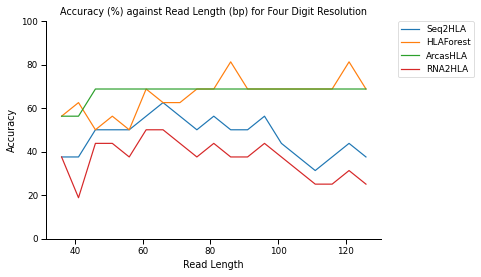

In [177]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.lineplot(x = "read_length", y = "four digit", data=df,hue="caller")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy (%) against Read Length (bp) for Four Digit Resolution") 
plt.legend(labels=tool_names,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,100))
sns.despine()
plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)

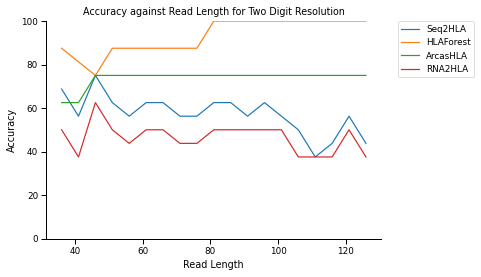

In [178]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.lineplot(x = "read_length", y = "two digit", data=df,hue="caller")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Read Length")
ax.set_title("Accuracy against Read Length for Two Digit Resolution") 
plt.legend(labels=tool_names,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,100))
sns.despine()
plt.savefig('../Figures/read_length_accuracy_2dig.png',bbox_inches ="tight",dpi=300)